# My CNN 

## Dataset loading

In [24]:
import tensorflow as tf
import tqdm
import cv2
import numpy as np
import matplotlib.pyplot as plt
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


## Download test

In [25]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

In [26]:
print ("Training data:")
print ("Number of examples: ", x_train.shape[0])
print ("Number of channels:",x_train.shape[3]) 
print ("Image size:", x_train.shape[1], x_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", x_test.shape[0])
print ("Number of channels:", x_test.shape[3])
print ("Image size:", x_test.shape[1], x_test.shape[2]) 

Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


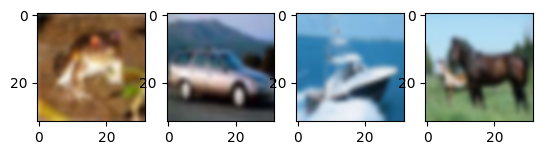

In [27]:
plt.subplot(141)
plt.imshow(x_train[0][:][:][:], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(x_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(x_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(x_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

## Normalize (traning set 건드린 값으로, test set도 정규화)

120.70756512369792 64.1500758911213


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-2.5247951877342226e-17 1.0000000000000022


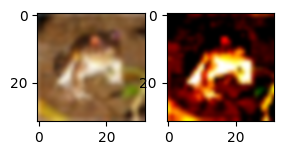

In [28]:
new_x_train = x_train
new_x_test = x_test

_mean = np.mean(x_train)
_std = np.std(x_train)
print(_mean, _std)
new_x_train = (new_x_train - _mean)/_std
new_x_test = (new_x_test - _mean)/_std
_mean = np.mean(new_x_train)
_std = np.std(new_x_train)
print(_mean, _std)
plt.subplot(141)
plt.imshow(x_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(new_x_train[0][:][:], interpolation="bicubic")
plt.grid(False)
plt.show()

## Traning

In [59]:
model = tf.keras.models.Sequential([
  # 1st
  tf.keras.layers.Conv2D(filters=128, kernel_size=2, padding='same', strides=1, activation='relu', input_shape=(32,32,3)),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', strides=1, activation='relu'),
  tf.keras.layers.Dropout(0.5),

  # 3rd
  tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', strides=2, activation='relu'),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
  # 4th
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1024, activation='relu'),  
  tf.keras.layers.Dense(512, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

#tf.keras.utils.plot_model(model, to_file='model02.png', show_shapes=True)

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_99 (Conv2D)          (None, 32, 32, 128)       1664      
                                                                 
 dropout_99 (Dropout)        (None, 32, 32, 128)       0         
                                                                 
 conv2d_100 (Conv2D)         (None, 32, 32, 64)        73792     
                                                                 
 dropout_100 (Dropout)       (None, 32, 32, 64)        0         
                                                                 
 conv2d_101 (Conv2D)         (None, 16, 16, 32)        18464     
                                                                 
 dropout_101 (Dropout)       (None, 16, 16, 32)        0         
                                                                 
 max_pooling2d_64 (MaxPoolin  (None, 8, 8, 32)       

In [60]:
val_scaled = new_x_test
val_target = y_test

history = model.fit(new_x_train, y_train, batch_size=256, epochs=10, validation_data=(val_scaled, val_target))
model.evaluate(new_x_test, y_test, batch_size=32, verbose=2)

Epoch 1/10
196/196 [==============================] - 9s 42ms/step - loss: 1.7379 - accuracy: 0.3718 - val_loss: 1.4862 - val_accuracy: 0.5019
Epoch 2/10
196/196 [==============================] - 8s 38ms/step - loss: 1.2719 - accuracy: 0.5409 - val_loss: 1.2792 - val_accuracy: 0.5942
Epoch 3/10
196/196 [==============================] - 8s 39ms/step - loss: 1.0828 - accuracy: 0.6113 - val_loss: 1.1206 - val_accuracy: 0.6342
Epoch 4/10
196/196 [==============================] - 8s 39ms/step - loss: 0.9597 - accuracy: 0.6559 - val_loss: 1.0070 - val_accuracy: 0.6705
Epoch 5/10
196/196 [==============================] - 8s 38ms/step - loss: 0.8607 - accuracy: 0.6940 - val_loss: 0.9520 - val_accuracy: 0.6901
Epoch 6/10
196/196 [==============================] - 8s 38ms/step - loss: 0.7818 - accuracy: 0.7234 - val_loss: 0.9278 - val_accuracy: 0.6935
Epoch 7/10
196/196 [==============================] - 8s 39ms/step - loss: 0.7081 - accuracy: 0.7493 - val_loss: 0.8826 - val_accuracy: 0.6990

[0.7945601344108582, 0.728600025177002]

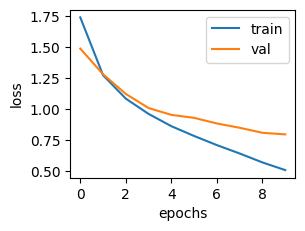

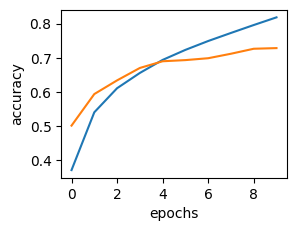

In [61]:
plt.subplot(221)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
plt.subplot(222)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

In [32]:
model.save("_mymodel01")

INFO:tensorflow:Assets written to: _mymodel01/assets


INFO:tensorflow:Assets written to: _mymodel01/assets
